In [1]:
# In this homework, we will use US Housing dataset. You will develop linear regression with
#   gradient descent algorithm to estimate the price of the house. In this homework, we will
#   use 80% and 20% split between training and evaluation (test) sets across all problems.
# (Note: You cannot use the built-in function from ML libraries for gradient descent, you
#   must implement it yourself. However, you can use built-in function for
#   normalization/standardization)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/JasonPham13UNCC/ECGR-3183_Assignments.git

data = pd.read_csv('ECGR-3183_Assignments/Data/Housing.csv')

Cloning into 'ECGR-3183_Assignments'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 9.26 KiB | 210.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
cols_to_use_one = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cols_to_use_two = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

house_data_one = data[cols_to_use_one]
house_data_two = data[cols_to_use_two]

In [4]:
# Problem 1(a)
# Develop a gradient descent training and evaluation code that predicts housing price based on
#   the following input variables: area, bedrooms, bathrooms, stories, parking
# Identify the best parameters for your linear regression model, based on the above input variables
# Plot the training and validation losses (MSE) (in a single graph, but two different lines).
#   For the learning rate, explore different values between 0.1 and 0.01 (your choice).
#   Initialize your parameters (thetas to zero). For the training iteration, choose what you
#   believe fits the best.

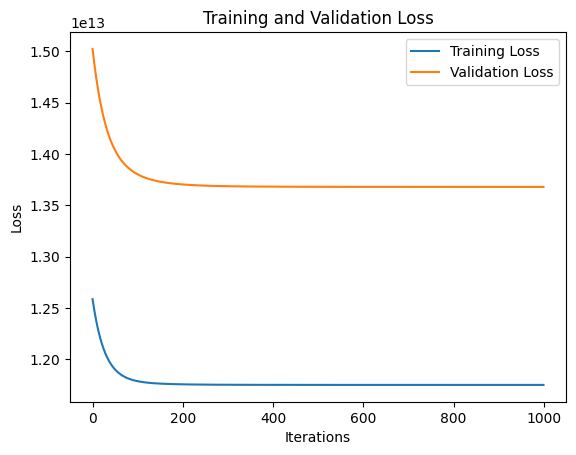

In [5]:
X = house_data_one[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = house_data_one['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

theta = np.zeros(X_train_norm.shape[1])

def mse_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return np.sum((predictions - y) ** 2) / (2 * m)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        error_train = np.dot(X_train.T, (predictions_train - y_train))
        theta -= learning_rate * error_train / m_train
        train_losses.append(mse_loss(X_train, y_train, theta))

        predictions_eval = X_eval.dot(theta)
        eval_loss = mse_loss(X_eval, y_eval, theta)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate = 0.01
iterations = 1000
theta_final, train_losses, eval_losses = gradient_descent(X_train_norm, y_train, X_eval_norm, y_eval, theta, learning_rate, iterations)

loss_eval = eval_losses[-1]

plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [6]:
# Problem 1(b)
# Develop a gradient descent training and evaluation code that predicts housing price based on
#   the following input variables: area, bedrooms, stories, mainroad, guestroom, basement,
#   hotwaterheating, airconditioning, parking, prefarea
# Identify the best parameters for your linear regression model, based on the above input variables.
# Plot the training and validation losses (MSE) (in a single graph, but two different lines) over your
#   training iteration. Compare your linear regression model against problem 1 a. For the learning rate,
#   explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero).
#   For the training iteration, choose what you believe fits the best.

In [7]:
X = house_data_two[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = house_data_two['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

theta = np.zeros(X_train_norm.shape[1])

def mse_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return np.sum((predictions - y) ** 2) / (2 * m)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        error_train = np.dot(X_train.T, (predictions_train - y_train))
        theta -= learning_rate * error_train / m_train
        train_losses.append(mse_loss(X_train, y_train, theta))

        predictions_eval = X_eval.dot(theta)
        eval_loss = mse_loss(X_eval, y_eval, theta)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate = 0.01
iterations = 1000
theta_final, train_losses, eval_losses = gradient_descent(X_train_norm, y_train, X_eval_norm, y_eval, theta, learning_rate, iterations)

loss_eval = eval_losses[-1]

plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<ipython-input-7-822a1a43a876>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-7-822a1a43a876>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-7-822a1a43a876>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  r

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [8]:
# Problem 2(a)
# Repeat problem 1 a, this time with input normalization and input standardization as part of
#   your pre-processing logic. You need to perform two seperate trainings for standardization
#   and normalization.
# Plot the training and validation losses for both training and validation set based on input
#   standardization and input normalization. Compare your training accuracy between both scaling
#   approaches as well as the baseline training in problem 1 a. Which input scaling achieves the
#   best training? Explain your results.
#
# Standardization achieves the best training. It works best with the gradient descent.

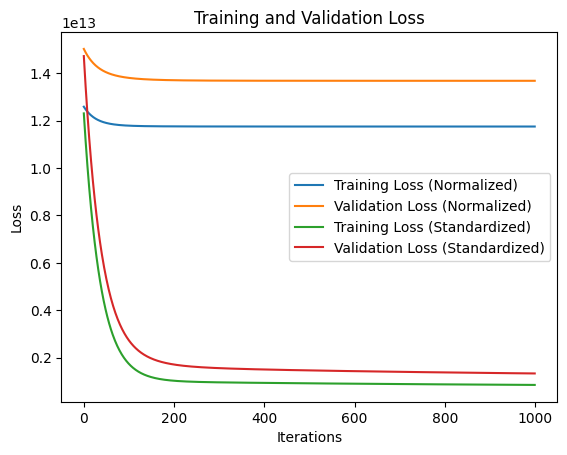

In [19]:
X = house_data_one[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = house_data_one['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

def standardize(X):
    return (X - X.min()) / (X.max() - X.min())

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

X_train_std = standardize(X_train)
X_eval_std = standardize(X_eval)

X_train_std = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_eval_std = np.c_[np.ones((X_eval_std.shape[0], 1)), X_eval_std]

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

def mse_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return np.sum((predictions - y) ** 2) / (2 * m)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = np.dot(X_train, theta)
        error_train = predictions_train - y_train
        gradient_train = np.dot(X_train.T, error_train) / m_train
        theta -= learning_rate * gradient_train
        train_losses.append(mse_loss(X_train, y_train, theta))

        predictions_eval = np.dot(X_eval, theta)
        eval_loss = mse_loss(X_eval, y_eval, theta)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate_norm = 0.01
iterations_norm = 1000
theta_final_norm, train_losses_norm, eval_losses_norm = gradient_descent(X_train_norm, y_train, X_eval_norm, y_eval, theta_norm, learning_rate_norm, iterations_norm)

learning_rate_std = 0.01
iterations_std = 1000
theta_final_std, train_losses_std, eval_losses_std = gradient_descent(X_train_std, y_train, X_eval_std, y_eval, theta_std, learning_rate_std, iterations_std)

loss_eval_norm = eval_losses_norm[-1]
loss_eval_std = eval_losses_std[-1]

plt.plot(train_losses_norm, label='Training Loss (Normalized)')
plt.plot(eval_losses_norm, label='Validation Loss (Normalized)')
plt.plot(train_losses_std, label='Training Loss (Standardized)')
plt.plot(eval_losses_std, label='Validation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Problem 2(b)
# Repeat problem 1 b, this time with input normalization and input standardization as part of
#   your pre-processing logic. You need to perform two separate trainings for standardization
#   and normalization.
# Plot the training and validation losses for both training and validation set based on input
#   standardization and input normalization. Compare your training accuracy between both scaling
#   appraoches as well as the baseline training in problem 1 b. Which input scaling achieves the
#   best training? Explain your results.
#
# Normalization is the best training.

In [18]:
X = house_data_two[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = house_data_two['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

def standardize(X):
    return (X - X.min()) / (X.max() - X.min())

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

X_train_std = standardize(X_train)
X_eval_std = standardize(X_eval)

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

def mse_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return np.sum((predictions - y) ** 2) / (2 * m)

def gradient_descent(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = np.dot(X_train, theta)
        error_train = predictions_train - y_train
        gradient_train = np.dot(X_train.T, error_train) / m_train
        theta -= learning_rate * gradient_train
        train_losses.append(mse_loss(X_train, y_train, theta))

        predictions_eval = np.dot(X_eval, theta)
        eval_loss = mse_loss(X_eval, y_eval, theta)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate_norm = 0.01
iterations_norm = 1000
theta_final_norm, train_losses_norm, eval_losses_norm = gradient_descent(X_train_norm, y_train, X_eval_norm, y_eval, theta_norm, learning_rate_norm, iterations_norm)

learning_rate_std = 0.01
iterations_std = 1000
theta_final_std, train_losses_std, eval_losses_std = gradient_descent(X_train_std, y_train, X_eval_std, y_eval, theta_std, learning_rate_std, iterations_std)

loss_eval_norm = eval_losses_norm[-1]
loss_eval_std = eval_losses_std[-1]

plt.plot(train_losses_norm, label='Training Loss (Normalized)')
plt.plot(eval_losses_norm, label='Validation Loss (Normalized)')
plt.plot(train_losses_std, label='Training Loss (Standardized)')
plt.plot(eval_losses_std, label='Validation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


<ipython-input-18-785844123da1>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-18-785844123da1>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-18-785844123da1>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Problem 3(a)
# Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that
#   in this case, you need to modify the gradient descent logic for your training set, but you
#   don't need to change the equation to compute MSE loss for the training and evaluation set.
# Plot your results (both training and evaluation losses) for the best input scaling approach
#   (standardization or normalization). Explain your results and compare them against problem
#   2 a.

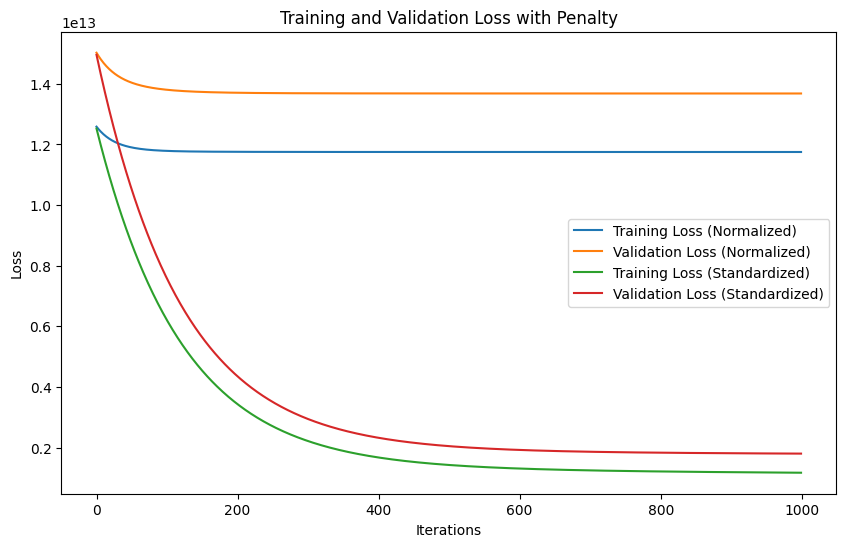

In [17]:
X = house_data_one[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = house_data_one['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

def standardize(X):
    return (X - X.min()) / (X.max() - X.min())

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

X_train_std = standardize(X_train)
X_eval_std = standardize(X_eval)

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

def mse_loss_with_penalty(X, y, theta, lambda_val):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    penalty = (lambda_val / (2 * m)) * np.sum(theta[1:] ** 2)
    return (np.sum(error ** 2) / (2 * m)) + penalty

def gradient_descent_with_penalty(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations, lambda_val):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = np.dot(X_train, theta)
        error_train = predictions_train - y_train
        gradient_train = (np.dot(X_train.T, error_train) + lambda_val * np.concatenate(([0], theta[1:]))) / m_train
        theta -= learning_rate * gradient_train
        train_losses.append(mse_loss_with_penalty(X_train, y_train, theta, lambda_val))

        predictions_eval = np.dot(X_eval, theta)
        eval_loss = mse_loss_with_penalty(X_eval, y_eval, theta, lambda_val)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate_norm = 0.01
iterations_norm = 1000
lambda_val = 0.1
theta_final_norm, train_losses_norm, eval_losses_norm = gradient_descent_with_penalty(X_train_norm, y_train, X_eval_norm, y_eval, theta_norm, learning_rate_norm, iterations_norm, lambda_val)

learning_rate_std = 0.01
iterations_std = 1000
theta_final_std, train_losses_std, eval_losses_std = gradient_descent_with_penalty(X_train_std, y_train, X_eval_std, y_eval, theta_std, learning_rate_std, iterations_std, lambda_val)

loss_eval_norm = eval_losses_norm[-1]
loss_eval_std = eval_losses_std[-1]

plt.figure(figsize=(10, 6))
plt.plot(train_losses_norm, label='Training Loss (Normalized)')
plt.plot(eval_losses_norm, label='Validation Loss (Normalized)')
plt.plot(train_losses_std, label='Training Loss (Standardized)')
plt.plot(eval_losses_std, label='Validation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with Penalty')
plt.legend()
plt.show()

In [ ]:
# Problem 3(b)
# Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that
#   in this case, you need to modify the gradient descent logic (parameter update equations),
#   but you don't need to change the equation to compute MSe loss for the training and evaluation
#   set.
# Plot your results (both training and evaluation losses) for the best input scaling approach
#   (standardization or normalization). Explain your results and compare them against problem
#   2 b.

In [16]:
X = house_data_two[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = house_data_two['price']

from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X):
    return (X - X.mean()) / X.std()

def standardize(X):
    return (X - X.min()) / (X.max() - X.min())

X_train_norm = normalize(X_train)
X_eval_norm = normalize(X_eval)

X_train_std = standardize(X_train)
X_eval_std = standardize(X_eval)

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

def mse_loss_with_penalty(X, y, theta, lambda_val):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    penalty = (lambda_val / (2 * m)) * np.sum(theta[1:] ** 2)
    return (np.sum(error ** 2) / (2 * m)) + penalty

def gradient_descent_with_penalty(X_train, y_train, X_eval, y_eval, theta, learning_rate, iterations, lambda_val):
    m_train = len(y_train)
    m_eval = len(y_eval)
    train_losses = []
    eval_losses = []
    for i in range(iterations):
        predictions_train = np.dot(X_train, theta)
        error_train = predictions_train - y_train
        gradient_train = (np.dot(X_train.T, error_train) + lambda_val * np.concatenate(([0], theta[1:]))) / m_train
        theta -= learning_rate * gradient_train
        train_losses.append(mse_loss_with_penalty(X_train, y_train, theta, lambda_val))

        predictions_eval = np.dot(X_eval, theta)
        eval_loss = mse_loss_with_penalty(X_eval, y_eval, theta, lambda_val)
        eval_losses.append(eval_loss)

    return theta, train_losses, eval_losses

learning_rate_norm = 0.01
iterations_norm = 1000
lambda_val = 0.1
theta_final_norm, train_losses_norm, eval_losses_norm = gradient_descent_with_penalty(X_train_norm, y_train, X_eval_norm, y_eval, theta_norm, learning_rate_norm, iterations_norm, lambda_val)

learning_rate_std = 0.01
iterations_std = 1000
theta_final_std, train_losses_std, eval_losses_std = gradient_descent_with_penalty(X_train_std, y_train, X_eval_std, y_eval, theta_std, learning_rate_std, iterations_std, lambda_val)

loss_eval_norm = eval_losses_norm[-1]
loss_eval_std = eval_losses_std[-1]

plt.figure(figsize=(10, 6))
plt.plot(train_losses_norm, label='Training Loss (Normalized)')
plt.plot(eval_losses_norm, label='Validation Loss (Normalized)')
plt.plot(train_losses_std, label='Training Loss (Standardized)')
plt.plot(eval_losses_std, label='Validation Loss (Standardized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with Penalty')
plt.legend()
plt.show()

<ipython-input-16-886986a83b52>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-16-886986a83b52>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (X - X.mean()) / X.std()
<ipython-input-16-886986a83b52>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


TypeError: unsupported operand type(s) for -: 'str' and 'str'